In [1]:
# import
import matplotlib.pyplot as plt   # plot the pictures
import pandas as pd
import numpy as np
import random
import warnings

warnings.filterwarnings('ignore')

In [2]:
# read CSV and change to dataframe
pokemon_CSV = 'pokemon.csv'
pokemon_data = pd.read_csv(pokemon_CSV, low_memory = False)
pokemon_df = pd.DataFrame(pokemon_data)
pokemon_df.head(10)

,name,species,cp,cp_new
0,Pidgey1,Pidgey,384,694
1,Pidgey2,Pidgey,366,669
2,Pidgey3,Pidgey,353,659
3,Pidgey4,Pidgey,338,640
4,Pidgey5,Pidgey,242,457
5,Pidgey6,Pidgey,129,243
6,Pidgey7,Pidgey,10,15
7,Pidgey8,Pidgey,25,47
8,Pidgey9,Pidgey,24,47
9,Pidgey10,Pidgey,161,305


In [3]:
data = pokemon_df.drop('species', axis = 1)
data = data.drop('name', axis = 1)
data.head()

,cp,cp_new
0,384,694
1,366,669
2,353,659
3,338,640
4,242,457


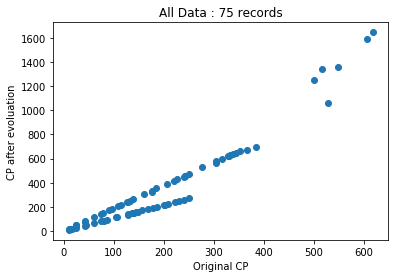

In [4]:
# plot the Data chart
plt.title('All Data : 75 records')
plt.xlabel('Original CP')
plt.ylabel('CP after evoluation')
plt.scatter(data['cp'], data['cp_new'])
plt.savefig('All Data.png')
plt.show()

In [5]:
data = data.sample(frac=1).reset_index(drop=True)

In [6]:
# split, get train and test data
train = data.loc['0':'5','cp':'cp_new']      # train data : 50
test = data.loc['5':'8','cp':'cp_new']       # test data : 25
print("train data :",len(train))
print("test data :",len(test))

train data : 50
test data : 25


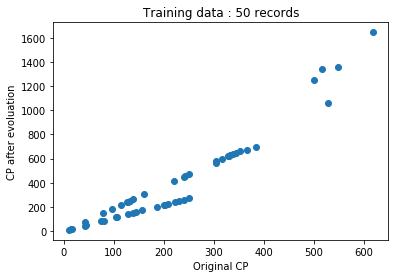

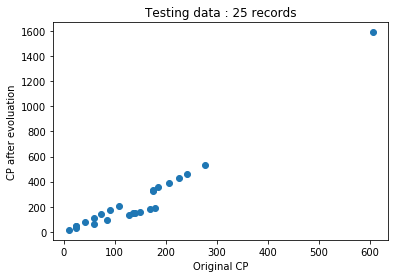

In [16]:
# plot the train and test data
plt.title('Training data : 50 records')
plt.xlabel('Original CP')
plt.ylabel('CP after evoluation')
plt.scatter(train['cp'], train['cp_new'])
plt.savefig('Training data.png')
plt.show()

plt.title('Testing data : 25 records')
plt.xlabel('Original CP')
plt.ylabel('CP after evoluation')
plt.scatter(test['cp'], test['cp_new'])
plt.savefig('Testing data.png')
plt.show()

In [8]:
train_dict = train.set_index('cp').T.to_dict('list') # make dataframe to dict
test_dict = test.set_index('cp').T.to_dict('list') # make dataframe to dict

In [9]:
# one order parameters setting
loss = 0
loss_history = []
loss_test_history = []
loss_flag = True
iteration = 0
lr = 0.00000001          # the value of lr need to be lower and lower in this case

bias = random.uniform(0, 1)
weight = random.uniform(0, 1)
print("Bias value is",bias)
print("Weight value is",weight)

Bias value is 0.03999462397661768
Weight value is 0.48025927521984024


learning rate : 1e-08
iteration : 70
train RMSE : 128.6560433412764
test RMSE : 103.51273348398492
bias : 0.041833467744878415
weight : 2.003336550539406


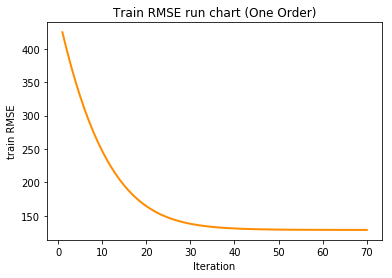

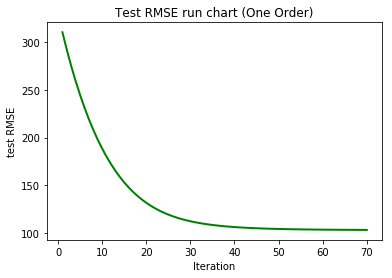

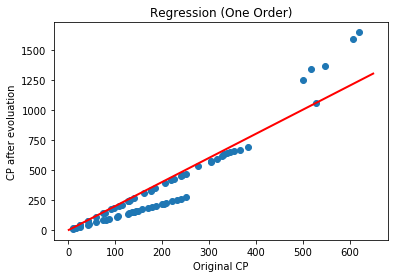

In [10]:
# one order train
while (loss_flag):
    
    predict = 0       # initialize
    temp_loss = 0
    loss = 0
    loss_test = 0
    weight_changeValue = 0
    bias_changeValue = 0
    iteration = iteration + 1
    
    for cp,cp_new in train_dict.items():      # compute the loss and training the data
        predict = bias + weight*cp      
        temp_loss = (cp_new[0]-predict)*(cp_new[0]-predict)
        loss = temp_loss + loss
        
        weight_changeValue_temp = 2*(cp_new[0]-predict)*(-cp)        
        bias_changeValue_temp = 2*(cp_new[0]-predict)*(-1)
        
        weight_changeValue = weight_changeValue + weight_changeValue_temp
        bias_changeValue = bias_changeValue + bias_changeValue_temp
        
    for cp,cp_new in test_dict.items():
        test_cpNew_predict = bias + weight*cp
        loss_test = loss_test + (test_cpNew_predict-cp_new[0])*(test_cpNew_predict-cp_new[0])
    
    weight = weight - lr*weight_changeValue   # renew the parameters
    bias = bias - lr*bias_changeValue
    
    loss = (loss/len(train))**0.5             # record the loss
    loss_test = (loss_test / len(test))**0.5
    loss_history.append(loss)
    loss_test_history.append(loss_test)
    
    if(iteration>3):                          # the min allow loss
        if(loss<50 or abs(loss_history[iteration-1] - loss_history[iteration-2])<0.005):
            loss_flag = False
            
# show the training result
print("learning rate :",lr)
print("iteration :",iteration)
print("train RMSE :",loss)
print("test RMSE :",loss_test)
print("bias :",bias)
print("weight :",weight)

plt.title('Train RMSE run chart (One Order)')
plt.xlabel('Iteration')
plt.ylabel('train RMSE')
plt.plot(range(1,len(loss_history)+1), loss_history, lw = 2, c='darkorange')
plt.savefig('Train RMSE run chart (One Order).png')
plt.show()

plt.title('Test RMSE run chart (One Order)')
plt.xlabel('Iteration')
plt.ylabel('test RMSE')
plt.plot(range(1,len(loss_test_history)+1), loss_test_history, lw = 2, c='green')
plt.savefig('Test RMSE run chart (One Order).png')
plt.show()

xRegression = np.linspace(1,650)
yRegression = bias + weight * xRegression
plt.title('Regression (One Order)')
plt.xlabel('Original CP')
plt.ylabel('CP after evoluation')
plt.scatter(data['cp'], data['cp_new'])
plt.plot(xRegression, yRegression, lw=2, c='red') 
plt.savefig('Regression (One Order).png')
plt.show()

In [11]:
# second order parameters setting
loss = 0
loss_history = []
loss_test_history = []
loss_flag = True
iteration = 0
lr = 0.000000000000005          # the value of lr need to be lower and lower in this case

bias = random.uniform(0, 1)
weight1 = random.uniform(0, 1)
weight2 = random.uniform(0, 1)
print("bias value is",bias)
print("weight1 value is",weight1)
print("weight2 value is",weight2)

bias value is 0.6979976886709651
weight1 value is 0.9769717561371666
weight2 value is 0.911238369548258


learning rate : 5e-15
iteration : 1834
train RMSE : 66.28301928816427
test RMSE : 49.62421999475123
bias : 0.6979926166503911
weight1 : 0.9749548008988396
weight2 : 0.002647777121710334


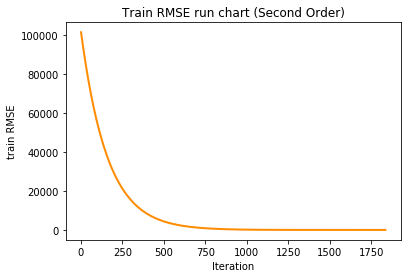

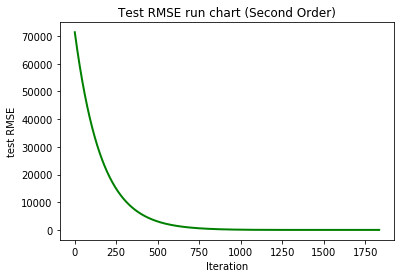

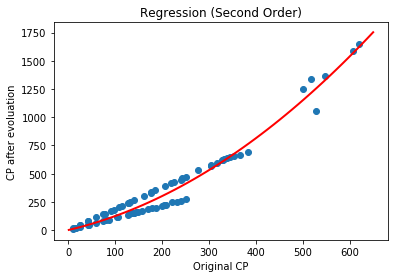

In [12]:
# second order train
while (loss_flag):
    
    predict = 0       # initialize
    temp_loss = 0
    loss = 0
    loss_test = 0
    weight1_changeValue = 0
    weight2_changeValue = 0
    bias_changeValue = 0
    iteration = iteration + 1
    
    for cp,cp_new in train_dict.items():      # compute the loss and training the data
        predict = bias + weight1*cp + weight2*cp*cp    
        temp_loss = (cp_new[0]-predict)*(cp_new[0]-predict)
        loss = temp_loss + loss
        
        weight1_changeValue_temp = 2*(cp_new[0]-predict)*(-cp)
        weight2_changeValue_temp = 2*(cp_new[0]-predict)*(-cp*cp)
        bias_changeValue_temp = 2*(cp_new[0]-predict)*(-1)
        
        weight1_changeValue = weight1_changeValue + weight1_changeValue_temp
        weight2_changeValue = weight2_changeValue + weight2_changeValue_temp
        bias_changeValue = bias_changeValue + bias_changeValue_temp
        
    for cp,cp_new in test_dict.items():
        test_cpNew_predict = bias + weight1*cp + weight2*cp*cp
        loss_test = loss_test + (test_cpNew_predict-cp_new[0])*(test_cpNew_predict-cp_new[0])
    
    weight1 = weight1 - lr*weight1_changeValue  # renew the parameters
    weight2 = weight2 - lr*weight2_changeValue
    bias = bias - lr*bias_changeValue
    
    loss = (loss/len(train))**0.5               # record the loss
    loss_test = (loss_test / len(test))**0.5
    loss_history.append(loss)
    loss_test_history.append(loss_test)
    
    if(iteration>3):                            # the min allow loss
        if(loss<60 or abs(loss_history[iteration-1] - loss_history[iteration-2])<0.0001):
            loss_flag = False

# show the training result
print("learning rate :",lr)
print("iteration :",iteration)
print("train RMSE :",loss)
print("test RMSE :",loss_test)
print("bias :",bias)
print("weight1 :",weight1)
print("weight2 :",weight2)

plt.title('Train RMSE run chart (Second Order)')
plt.xlabel('Iteration')
plt.ylabel('train RMSE')
plt.plot(range(1,len(loss_history)+1), loss_history, lw = 2, c='darkorange')
plt.savefig('Train RMSE run chart (Second Order).png')
plt.show()

plt.title('Test RMSE run chart (Second Order)')
plt.xlabel('Iteration')
plt.ylabel('test RMSE')
plt.plot(range(1,len(loss_test_history)+1), loss_test_history, lw = 2, c='green')
plt.savefig('Test RMSE run chart (Second Order).png')
plt.show()

xRegression = np.linspace(1,650)
yRegression = bias + weight1 * xRegression + weight2 * xRegression**2
plt.title('Regression (Second Order)')
plt.xlabel('Original CP')
plt.ylabel('CP after evoluation')
plt.scatter(data['cp'], data['cp_new'])
plt.plot(xRegression, yRegression, lw=2, c='red')
plt.savefig('Regression (Second Order).png')
plt.show()

In [13]:
# third order parameters setting
loss = 0
loss_history = []
loss_test_history = []
loss_flag = True
iteration = 0
lr = 0.00000000000000000001          # the value of lr need to be lower and lower in this case

bias = random.uniform(0, 1)
weight1 = random.uniform(0, 0.01)
weight2 = random.uniform(0, 0.01)
weight3 = random.uniform(0, 0.1)
print("bias value is",bias)
print("weight1 value is",weight1)
print("weight2 value is",weight2)
print("weight3 value is",weight3)

bias value is 0.4202521634671883
weight1 value is 0.004761715082585689
weight2 value is 0.009990278691843523
weight3 value is 0.08281122527808064


learning rate : 1e-20
iteration : 3934
train RMSE : 99.45044317246058
test RMSE : 59.20795714051961
bias : 0.4202521627413282
weight1 : 0.004761387967572346
weight2 : 0.00983016461753842
weight3 : -9.710224750283936e-06


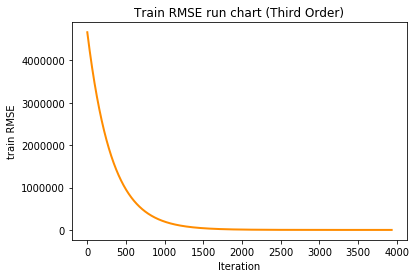

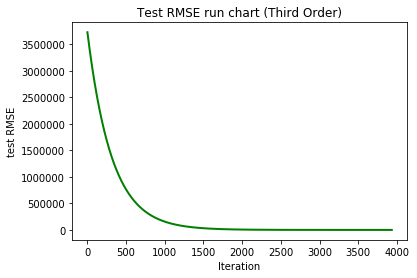

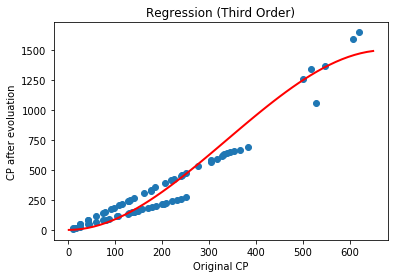

In [15]:
# third order train
while (loss_flag):
    
    predict = 0       # initialize
    temp_loss = 0
    loss = 0
    loss_test = 0
    weight1_changeValue = 0
    weight2_changeValue = 0
    weight3_changeValue = 0
    bias_changeValue = 0
    iteration = iteration + 1
    
    for cp,cp_new in train_dict.items():      # compute the loss and training the data
        predict = bias + weight1*cp + weight2*cp*cp + weight3*cp*cp*cp
        temp_loss = (cp_new[0]-predict)*(cp_new[0]-predict)
        loss = temp_loss + loss
        
        weight1_changeValue_temp = 2*(cp_new[0]-predict)*(-cp)
        weight2_changeValue_temp = 2*(cp_new[0]-predict)*(-cp*cp)
        weight3_changeValue_temp = 2*(cp_new[0]-predict)*(-cp*cp*cp)
        bias_changeValue_temp = 2*(cp_new[0]-predict)*(-1)
        
        weight1_changeValue = weight1_changeValue + weight1_changeValue_temp
        weight2_changeValue = weight2_changeValue + weight2_changeValue_temp
        weight3_changeValue = weight3_changeValue + weight3_changeValue_temp
        bias_changeValue = bias_changeValue + bias_changeValue_temp
        
    for cp,cp_new in test_dict.items():
        test_cpNew_predict = bias + weight1*cp + weight2*cp*cp + weight3*cp*cp*cp
        loss_test = loss_test + (test_cpNew_predict-cp_new[0])*(test_cpNew_predict-cp_new[0])
    
    weight1 = weight1 - lr*weight1_changeValue   # renew the parameters
    weight2 = weight2 - lr*weight2_changeValue
    weight3 = weight3 - lr*weight3_changeValue
    bias = bias - lr*bias_changeValue
    
    loss = (loss/len(train))**0.5               # record the loss
    loss_test = (loss_test / len(test))**0.5 
    loss_history.append(loss)
    loss_test_history.append(loss_test)
    
    if(iteration>3):                            # the min allow loss
        if(loss<50 or abs(loss_history[iteration-2] - loss_history[iteration-3])<0.01):
            loss_flag = False

# show the training result
print("learning rate :",lr)
print("iteration :",iteration)
print("train RMSE :",loss)
print("test RMSE :",loss_test)
print("bias :",bias)
print("weight1 :",weight1)
print("weight2 :",weight2)
print("weight3 :",weight3)

plt.title('Train RMSE run chart (Third Order)')
plt.xlabel('Iteration')
plt.ylabel('train RMSE')
plt.plot(range(1,len(loss_history)+1), loss_history, lw = 2, c='darkorange')
plt.savefig('Train RMSE run chart (Third Order).png')
plt.show()

plt.title('Test RMSE run chart (Third Order)')
plt.xlabel('Iteration')
plt.ylabel('test RMSE')
plt.plot(range(1,len(loss_test_history)+1), loss_test_history, lw = 2, c='green')
plt.savefig('Test RMSE run chart (Third Order).png')
plt.show()

xRegression = np.linspace(1,650)
yRegression = bias + weight1 * xRegression + weight2 * xRegression**2 + weight3 * xRegression**3
plt.title('Regression (Third Order)')
plt.xlabel('Original CP')
plt.ylabel('CP after evoluation')
plt.scatter(data['cp'], data['cp_new'])
plt.plot(xRegression, yRegression, lw=2, c='red')
plt.savefig('Regression (Third Order).png')
plt.show()